# Recognizing HandWritten Digits On Mnist Dataset using KNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data Preparation

In [6]:
df=pd.read_csv(r'Desktop\train.csv')
print(df.shape)

(42000, 785)


In [7]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [10]:
# As we can see there are 60000 rows and ist column is a label and rest 784 columns are storing pixel data. and basically 28 * 28 matrix has been reshaped into a row

# Visualisation

In [8]:
df.head(n=5)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data=df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [10]:
X=data[:,1:]
Y=data[:,0]
print(X.shape)
print(Y.shape)

(42000, 784)
(42000,)


# Spliting into Training and testing Data

In [11]:
split=int(0.8*X.shape[0])
#print(split)
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


# Visualise some samples

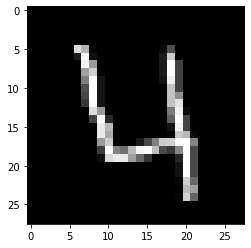

4


In [12]:
def drawing(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
drawing(X_train[3])
print(Y_train[3])
    
    

In [13]:
print(Y_train[3])

4


# Applying KNN

In [14]:
# calculate euclidian distance
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
def KNN(X,Y,query_point,k=5):
    m=X.shape[0]
    val=[]
    for i in range(m):
        d=distance(query_point,X[i])
        val.append((d,Y[i]))
    val=sorted(val)
    val=val[:k]
    val=np.array(val)
    new_val=np.unique(val[:,1],return_counts=True)
    index=new_val[1].argmax()
    predict=new_val[0][index]
    return predict

In [24]:
pred=KNN(X_train,Y_train,X_test[1])
print(int(pred))

7


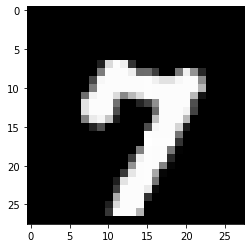

7


In [25]:
drawing(X_test[1])
print(Y_test[1])
